In [74]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [75]:
df=pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [76]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [77]:
df.shape

(270, 14)

In [78]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Heart Disease']=lb.fit_transform(df['Heart Disease'])


<Axes: >

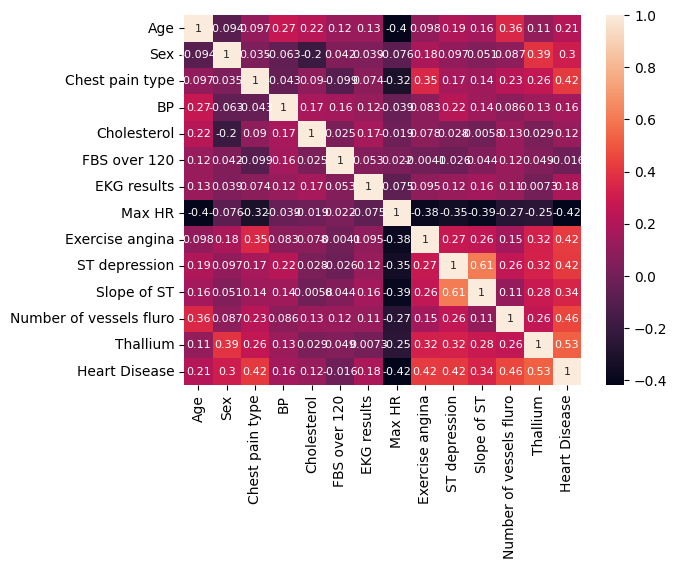

In [79]:
sns.heatmap(df.corr(),annot=True,annot_kws={"size":8})

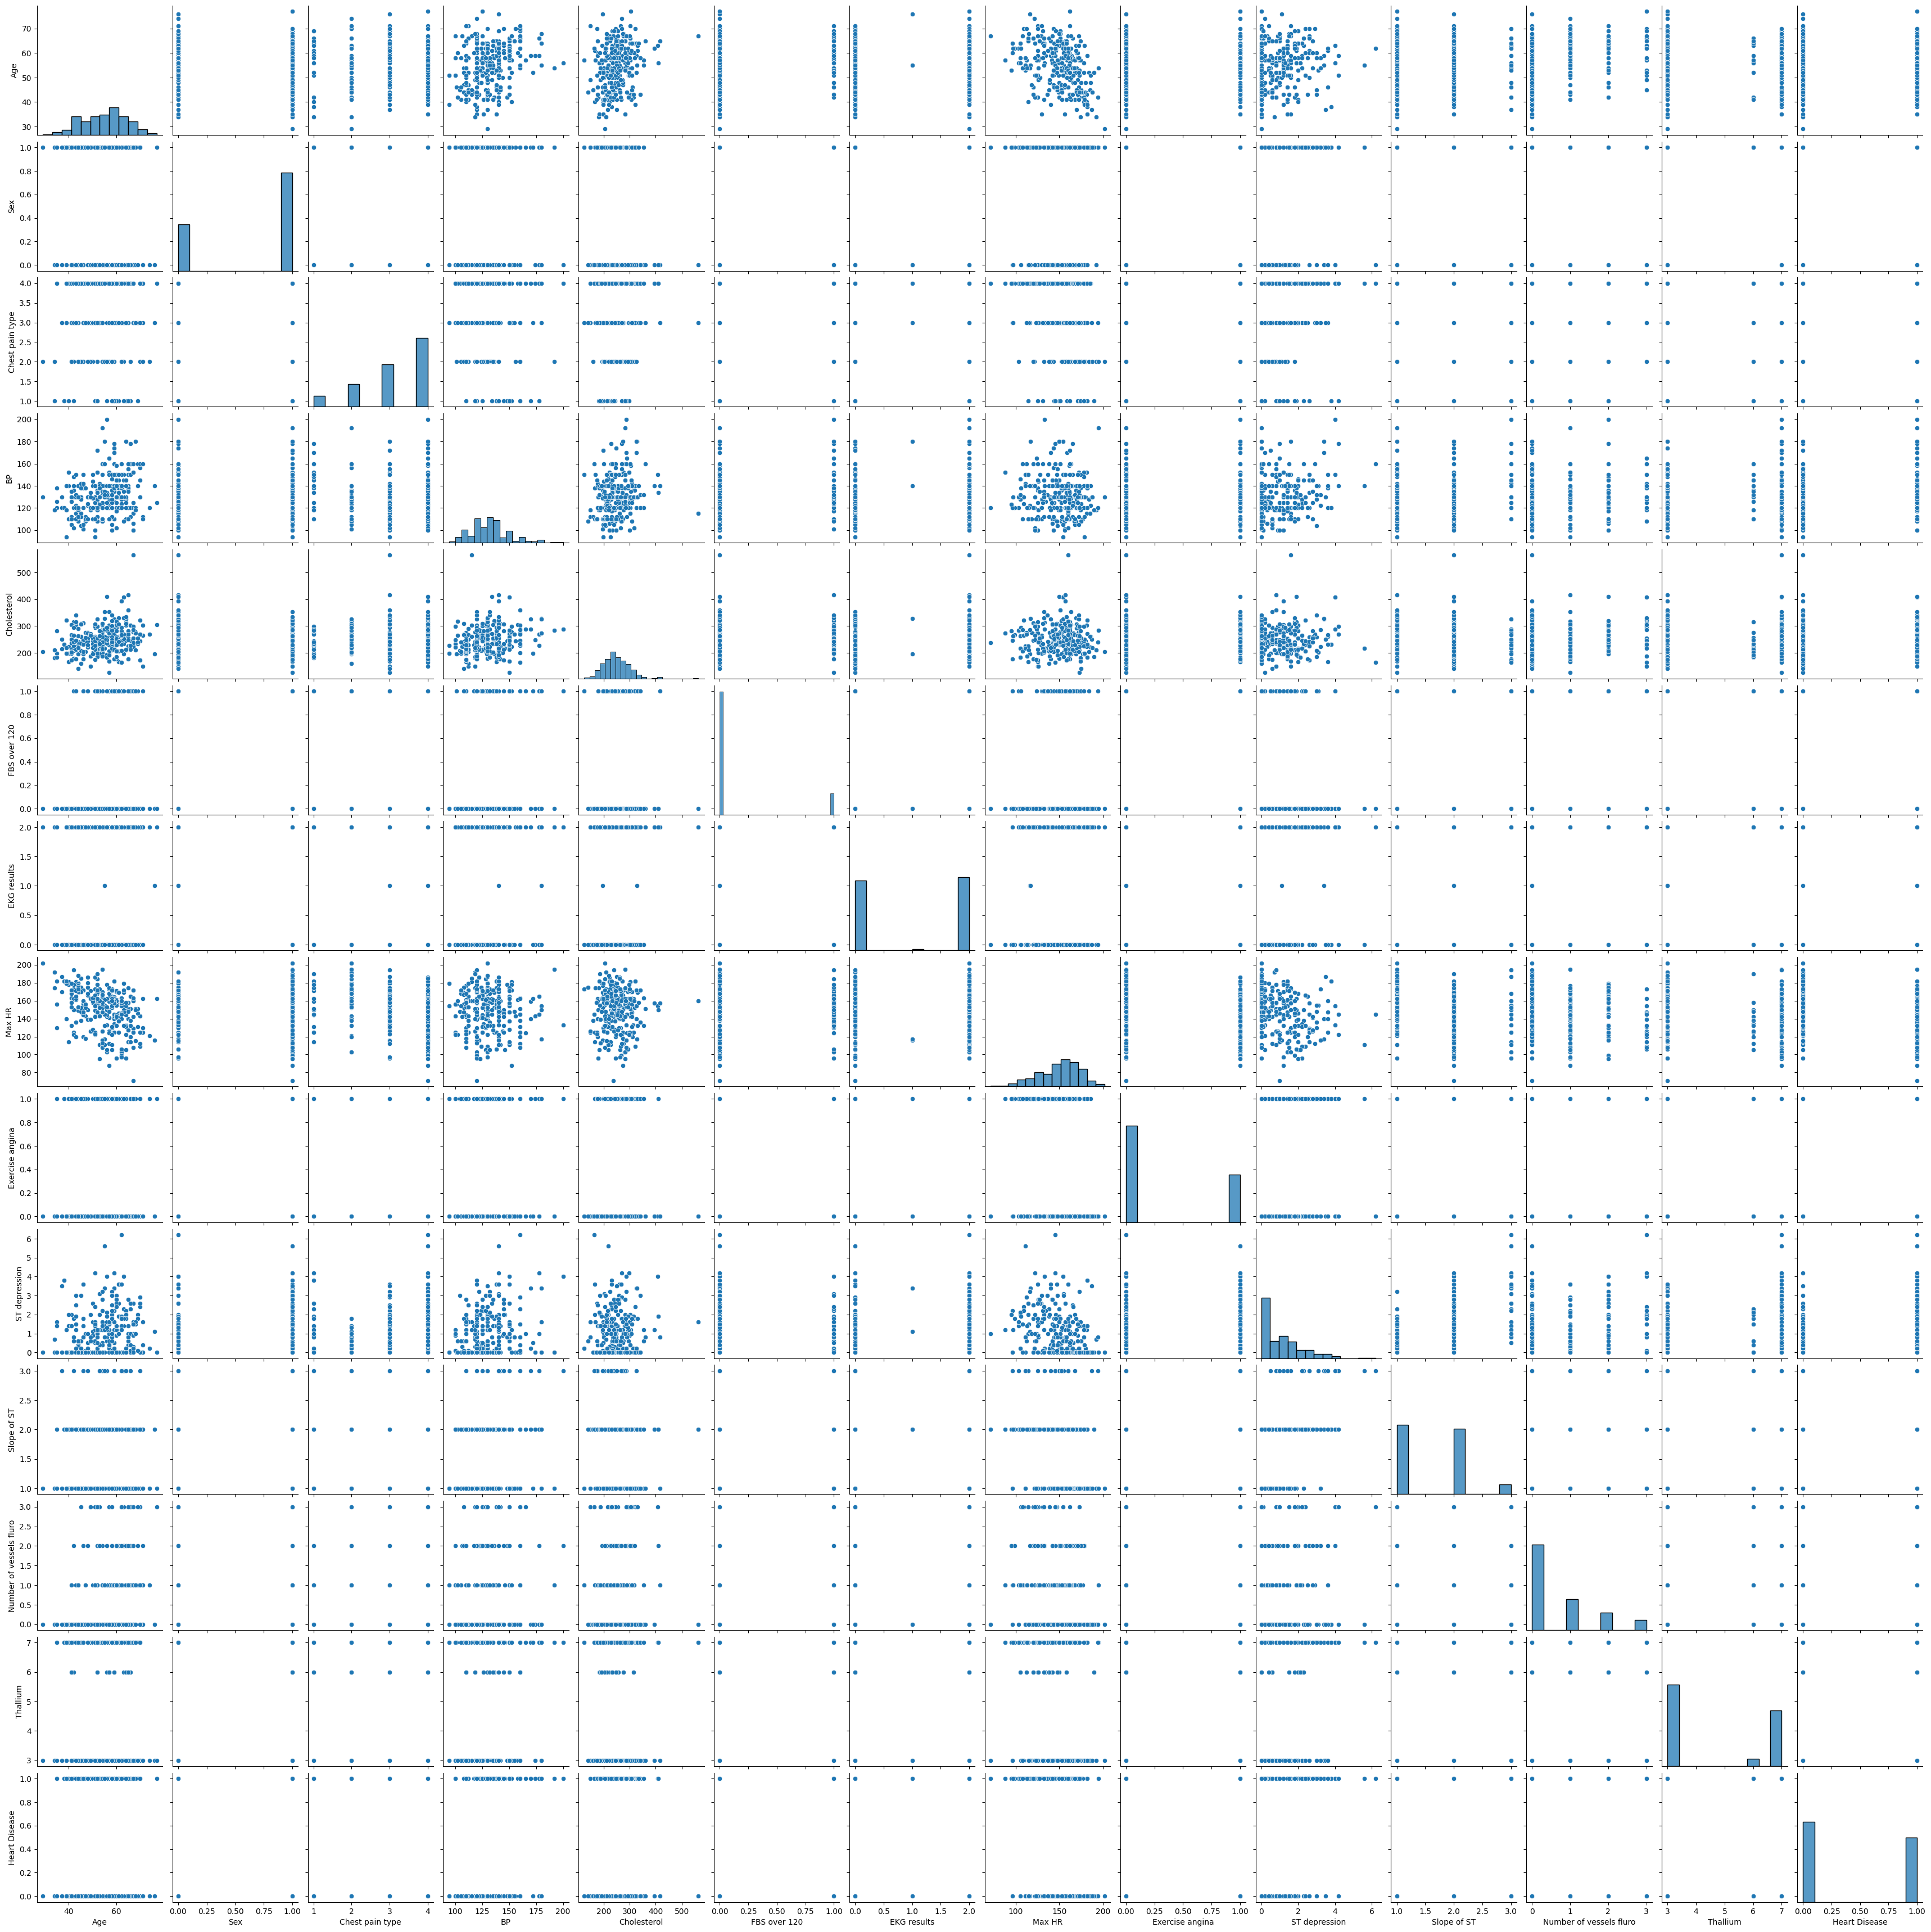

In [80]:
sns.pairplot(df)
plt.show()

In [81]:
from scipy.stats import zscore
z = np.abs(zscore(df))
dfn = df[(z < 3).all(axis=1)]

In [82]:
dfn.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,54.222222,0.689655,3.160920,130.697318,246.827586,0.145594,1.003831,149.950192,0.329502,0.990038,1.567050,0.647510,4.647510,0.432950
std,9.145220,0.463524,0.955231,17.051628,45.082286,0.353376,0.998068,22.712277,0.470935,1.047036,0.601526,0.927301,1.931093,0.496436
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,244.000000,0.000000,1.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,167.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


In [83]:
dfn.shape

(261, 14)

In [84]:
df.shape
dfn

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(dfn.iloc[:,:-1]),columns=dfn.columns[:-1])    

In [86]:
x=df1
y=dfn['Heart Disease']

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
lr=LogisticRegression()
kn=KNeighborsClassifier()
s=SVC()
dt=DecisionTreeClassifier(max_depth=5,min_samples_leaf=10)


In [89]:
l=[lr,kn,s,dt]

In [90]:
for sm_resample in l:
    sm_resample.fit(x_train,y_train)
    pred = model.predict(x_train)
    print(f"Model: {sm_resample.__class__.__name__}")
    print('==============================================')
    print("Accuracy Score:",accuracy_score(pred,y_train)*100)
    report= classification_report(y_train, pred,output_dict=True)
    print(pd.DataFrame(report).transpose())
    print("=============================================")

Model: LogisticRegression
Accuracy Score: 85.09615384615384
              precision    recall  f1-score     support
0              0.842520  0.906780  0.873469  118.000000
1              0.864198  0.777778  0.818713   90.000000
accuracy       0.850962  0.850962  0.850962    0.850962
macro avg      0.853359  0.842279  0.846091  208.000000
weighted avg   0.851900  0.850962  0.849777  208.000000
Model: KNeighborsClassifier
Accuracy Score: 85.09615384615384
              precision    recall  f1-score     support
0              0.842520  0.906780  0.873469  118.000000
1              0.864198  0.777778  0.818713   90.000000
accuracy       0.850962  0.850962  0.850962    0.850962
macro avg      0.853359  0.842279  0.846091  208.000000
weighted avg   0.851900  0.850962  0.849777  208.000000
Model: SVC
Accuracy Score: 85.09615384615384
              precision    recall  f1-score     support
0              0.842520  0.906780  0.873469  118.000000
1              0.864198  0.777778  0.818713   90.

In [91]:
dt.score(x_test,y_test)*100

81.13207547169812

In [92]:
dt.score(x_train,y_train)*100

83.65384615384616

In [93]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [94]:
ls=Lasso(alpha=0.001)   
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.5203980588964754

In [95]:
r=Ridge(alpha=0.001)   
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.5203980588964754

In [96]:
en=ElasticNet(alpha=0.001)   
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.5203980588964754

In [97]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y,cv=5)
print('cv score of dt ',score)
print('final Accuracy of dt : ', score.mean())

cv score of dt  [0.71698113 0.78846154 0.80769231 0.80769231 0.82692308]
final Accuracy of dt :  0.7895500725689404


In [98]:
import joblib

In [99]:
joblib.dump(lr,"LogisticRegression_model.pkl")

['LogisticRegression_model.pkl']

In [102]:
load_model=joblib.load("LogisticRegression_model.pkl")


In [105]:
pred=load_model.predict(x_test)
